<a href="https://colab.research.google.com/github/brodyandre/elt_em_dados_de_locacao/blob/main/etl_em_dados_de_locacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Dados de Locação de Imóveis 🏠
Este notebook realiza a limpeza e análise de um conjunto de dados relacionado a locação de imóveis. O objetivo é transformar, visualizar e explorar informações sobre os pagamentos de aluguel ao longo do tempo.

### 1. Instalação das Dependências 📦
O primeiro passo é instalar as bibliotecas necessárias para a análise de dados.

In [42]:
!pip install pandas

* Pandas: Para manipulação e análise de dados.

* NumPy: Para operações numéricas.

* Matplotlib & Seaborn: Para visualização de dados.

### 2. Carregamento e Leitura dos Dados 📂
O arquivo JSON com os dados de locação de imóveis é carregado e convertido em um DataFrame do Pandas para facilitar a manipulação.

In [43]:
import numpy as np
import json
import pandas as pd

with open('/content/dados_locacao_imoveis.json', 'r') as file:
    dados = json.load(file)

dados = pd.DataFrame(dados)
dados.columns

Index(['dados_locacao'], dtype='object')

A função json.load() lê o arquivo JSON e a função pd.DataFrame() converte o conteúdo em uma tabela (DataFrame).

### 3. Normalização e Expansão dos Dados 🔄
O conteúdo do campo dados_locacao é normalizado e expandido para transformar os dados em um formato mais adequado para análise.

In [44]:
dados = pd.json_normalize(dados['dados_locacao'])
colunas = list(dados.columns)
dados = dados.explode(colunas[1:])
dados.reset_index(drop=True, inplace=True)
dados.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
1,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
2,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
3,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
4,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"


A função pd.json_normalize() desestrutura dados aninhados, enquanto explode() é usada para expandir listas em colunas separadas.

### 4. Conversão de Datas 📅
As colunas de data são convertidas para o formato datetime, facilitando manipulações e cálculos posteriores.

In [46]:
dados['datas_combinadas_pagamento'] = pd.to_datetime(dados['datas_combinadas_pagamento'], dayfirst=True)
dados['datas_de_pagamento'] = pd.to_datetime(dados['datas_de_pagamento'], dayfirst=True)
dados.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),2022-06-01,2022-06-05,"$ 1000,0 reais"
1,A101 (blocoAP),2022-07-01,2022-07-03,"$ 2500,0 reais"
2,A102 (blocoAP),2022-06-02,2022-06-02,"$ 1100,0 reais"
3,A102 (blocoAP),2022-07-02,2022-07-06,"$ 2600,0 reais"
4,B201 (blocoAP),2022-06-03,2022-06-07,"$ 1200,0 reais"


A função pd.to_datetime() converte strings em objetos datetime

### 5. Formatação de Datas 🗓️
As datas de pagamento são formatadas para o padrão DD/MM/YYYY para uma apresentação mais legível.

In [47]:
print(dados['datas_combinadas_pagamento'].dt.strftime('%d/%m/%Y'))
print(dados['datas_de_pagamento'].dt.strftime('%d/%m/%Y'))
dados

0     01/06/2022
1     01/07/2022
2     02/06/2022
3     02/07/2022
4     03/06/2022
5     03/07/2022
6     04/06/2022
7     04/07/2022
8     05/06/2022
9     05/07/2022
10    06/06/2022
11    06/07/2022
12    07/06/2022
13    07/07/2022
14    08/06/2022
15    08/07/2022
16    09/06/2022
17    09/07/2022
18    10/06/2022
19    10/07/2022
20    11/06/2022
21    11/07/2022
22    12/06/2022
23    12/07/2022
24    13/06/2022
25    13/07/2022
26    14/06/2022
27    14/07/2022
28    15/06/2022
29    15/07/2022
Name: datas_combinadas_pagamento, dtype: object
0     05/06/2022
1     03/07/2022
2     02/06/2022
3     06/07/2022
4     07/06/2022
5     03/07/2022
6     07/06/2022
7     05/07/2022
8     10/06/2022
9     09/07/2022
10    08/06/2022
11    12/07/2022
12    07/06/2022
13    09/07/2022
14    10/06/2022
15    14/07/2022
16    10/06/2022
17    09/07/2022
18    16/06/2022
19    12/07/2022
20    17/06/2022
21    13/07/2022
22    15/06/2022
23    12/07/2022
24    19/06/2022
25    20/07/2022


,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),2022-06-01,2022-06-05,"$ 1000,0 reais"
1,A101 (blocoAP),2022-07-01,2022-07-03,"$ 2500,0 reais"
2,A102 (blocoAP),2022-06-02,2022-06-02,"$ 1100,0 reais"
3,A102 (blocoAP),2022-07-02,2022-07-06,"$ 2600,0 reais"
4,B201 (blocoAP),2022-06-03,2022-06-07,"$ 1200,0 reais"
5,B201 (blocoAP),2022-07-03,2022-07-03,"$ 2700,0 reais"
6,B202 (blocoAP),2022-06-04,2022-06-07,"$ 1300,0 reais"
7,B202 (blocoAP),2022-07-04,2022-07-05,"$ 2800,0 reais"
8,C301 (blocoAP),2022-06-05,2022-06-10,"$ 1400,0 reais"
9,C301 (blocoAP),2022-07-05,2022-07-09,"$ 2900,0 reais"


### 6. Tratamento de Valores Monetários 💸
A coluna valor_aluguel é limpa de caracteres não numéricos e convertida para valores numéricos (float).

In [48]:
dados['valor_aluguel'] = (
    dados['valor_aluguel']
    .str.replace(r'[^\d,]', '', regex=True)  # Remove caracteres não numéricos, exceto a vírgula
    .str.replace(',', '.')                   # Substitui vírgula por ponto
    .astype(float)                           # Converte para float
)
dados

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),2022-06-01,2022-06-05,1000.0
1,A101 (blocoAP),2022-07-01,2022-07-03,2500.0
2,A102 (blocoAP),2022-06-02,2022-06-02,1100.0
3,A102 (blocoAP),2022-07-02,2022-07-06,2600.0
4,B201 (blocoAP),2022-06-03,2022-06-07,1200.0
5,B201 (blocoAP),2022-07-03,2022-07-03,2700.0
6,B202 (blocoAP),2022-06-04,2022-06-07,1300.0
7,B202 (blocoAP),2022-07-04,2022-07-05,2800.0
8,C301 (blocoAP),2022-06-05,2022-06-10,1400.0
9,C301 (blocoAP),2022-07-05,2022-07-09,2900.0


### 7. Visualização dos Dados 📊
Agora, criamos uma visualização gráfica para observar a variação do valor do aluguel ao longo do tempo.

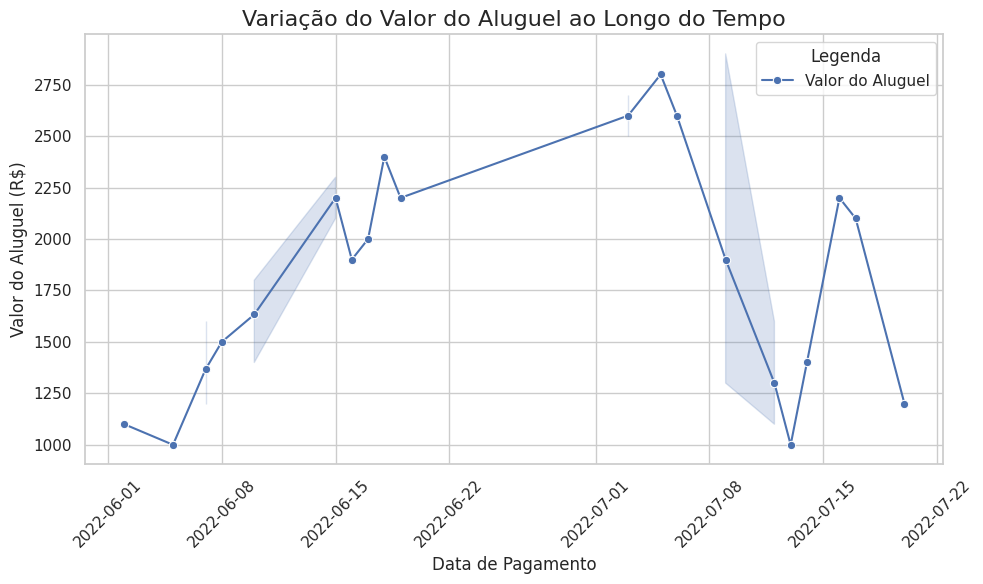

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico com a legenda
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados, x='datas_de_pagamento', y='valor_aluguel', marker='o', color='b', label='Valor do Aluguel')

# Personalizando o gráfico
plt.title('Variação do Valor do Aluguel ao Longo do Tempo', fontsize=16)
plt.xlabel('Data de Pagamento', fontsize=12)
plt.ylabel('Valor do Aluguel (R$)', fontsize=12)
plt.xticks(rotation=45)

# Adicionando a legenda
plt.legend(title='Legenda')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


A visualização mostra a evolução do valor do aluguel ao longo do tempo, utilizando a biblioteca Seaborn para criar um gráfico de linha estilizado.

### 8. Conclusão ✅
1. Removemos os dados em lista dentro do DataFrame
2. Verificamos os tipos de dados
3. Identificamos colunas numéricas
4. Transformamos as colunas mnuméricas para o tipo numérico

Este notebook permite uma análise visual e numérica detalhada dos dados de locação de imóveis, proporcionando insights sobre o comportamento dos pagamentos de aluguel ao longo do tempo. As etapas de limpeza e transformação dos dados garantem que o conjunto de dados esteja pronto para análise mais aprofundada ou para aplicação de modelos preditivos.

